In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import joblib
import os

print(f"Versão do Joblib: {joblib.__version__}")

# ==============================================================================
# --- 1. Definição de Caminhos ---
# ==============================================================================
print("--- 1. Definindo Caminhos para a V2 ---")

# Caminho para os dados brutos
DATA_FILE_PATH = '../data/raw/leish_dataset.csv'

# Diretório para salvar os modelos
MODEL_DIR = '../models'

# Nomes dos arquivos de saída para a V2 (Regressão Logística)
MODEL_FILE_PATH = os.path.join(MODEL_DIR, 'leish_model_v2.joblib')
SCALER_FILE_PATH = os.path.join(MODEL_DIR, 'data_scaler_v2.joblib')
COLUMNS_FILE_PATH = os.path.join(MODEL_DIR, 'training_columns_v2.joblib')

# Criar o diretório de modelos se ele não existir
os.makedirs(MODEL_DIR, exist_ok=True)

print(f"Arquivo de dados: {DATA_FILE_PATH}")
print(f"Salvando modelo em: {MODEL_FILE_PATH}")
print(f"Salvando scaler em: {SCALER_FILE_PATH}")
print(f"Salvando colunas em: {COLUMNS_FILE_PATH}")


# ==============================================================================
# --- 2. Load and Preprocess the FULL Data (Corrigido) ---
# ==============================================================================
print("\n--- 2. Carregando e Pré-processando Dados Completos (100%) ---")

df = pd.read_csv(DATA_FILE_PATH)
df_processed = df.copy()

# Lidar com valores ausentes
for col in df_processed.select_dtypes(include=['object']).columns:
    df_processed[col] = df_processed[col].fillna('Unknown')

# Codificar a variável Alvo
target_map = {'positivo': 1, 'negativo': 0, 'Unknown': 0}
df_processed['diagnosis'] = df_processed['diagnosis'].map(target_map).astype(int)

# Separar features (X) e alvo (y) do dataset COMPLETO
X_categorical = df_processed.drop('diagnosis', axis=1)
y = df_processed['diagnosis']

# Aplicar One-Hot Encoding (CORRIGIDO: drop_first=False)
X_numeric = pd.get_dummies(X_categorical, drop_first=False, dtype=int)

# Salvar a lista de colunas ANTES de escalar
training_columns = X_numeric.columns.tolist()

print(f"Shape das features (X) de treino final: {X_numeric.shape} (com {len(training_columns)} colunas)")
print(f"Shape do alvo (y) de treino final: {y.shape}")


# ==============================================================================
# --- 3. [NOVO] Fit the Scaler ---
# ==============================================================================
print("\n--- 3. Ajustando o StandardScaler com 100% dos Dados ---")

scaler = StandardScaler()

# Ajustar (fit) o scaler nos 100% dos dados pré-processados
# e transformá-los para o treino
X_scaled = scaler.fit_transform(X_numeric)

print("--- Scaler ajustado e dados transformados ---")


# ==============================================================================
# --- 4. Final Model Training (Champion: Logistic Regression) ---
# ==============================================================================
print("\n--- 4. Treinando o Modelo Campeão (Logistic Regression) com 100% dos Dados ---")

# Inicializar o LogisticRegression com os mesmos parâmetros do nosso teste vencedor
lr_champion = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced' # A estratégia vencedora
)

# Treinar o modelo nos dados COMPLETOS e ESCALADOS
lr_champion.fit(X_scaled, y)

print("--- Treinamento Final Concluído ---")


# ==============================================================================
# --- 5. Save Model, Scaler, and Column List ---
# ==============================================================================
print(f"\n--- 5. Salvando artefatos da V2 no diretório '{MODEL_DIR}' ---")

# 1. Salvar o modelo treinado
joblib.dump(lr_champion, MODEL_FILE_PATH)
print(f"Modelo salvo com sucesso em: {MODEL_FILE_PATH}")

# 2. Salvar o SCALER treinado
joblib.dump(scaler, SCALER_FILE_PATH)
print(f"Scaler salvo com sucesso em: {SCALER_FILE_PATH}")

# 3. Salvar a lista de colunas de treino
joblib.dump(training_columns, COLUMNS_FILE_PATH)
print(f"Lista de colunas salva com sucesso em: {COLUMNS_FILE_PATH}")


# ==============================================================================
# --- 6. (TESTE) Carregar Artefatos e Fazer uma Previsão ---
# ==============================================================================
print("\n--- 6. Teste de Verificação: Carregando artefatos V2 e prevendo ---")

try:
    # Carregar os 3 artefatos
    loaded_model = joblib.load(MODEL_FILE_PATH)
    loaded_scaler = joblib.load(SCALER_FILE_PATH)
    loaded_columns = joblib.load(COLUMNS_FILE_PATH)
    
    print("Modelo, Scaler e Colunas carregados com sucesso.")
    
    # Pegar uma amostra (a primeira linha) para testar
    sample_raw = X_numeric.iloc[[0]]
    
    # 1. Reindexar (simulando a API)
    sample_reindexed = sample_raw.reindex(columns=loaded_columns, fill_value=0)
    
    # 2. Escalar (novo passo obrigatório)
    sample_scaled = loaded_scaler.transform(sample_reindexed)
    
    # 3. Fazer a previsão
    prediction_proba = loaded_model.predict_proba(sample_scaled)[0]
    prediction = loaded_model.predict(sample_scaled)[0]
    
    print("\n--- Teste de Previsão na Amostra 0 ---")
    print(f"Amostra real (Target): {y.iloc[0]}")
    print(f"Previsão (Classe): {prediction}")
    print(f"Probabilidades: [Classe 0: {prediction_proba[0]:.4f}, Classe 1: {prediction_proba[1]:.4f}]")
    print("--- Verificação Concluída ---")

except Exception as e:
    print(f"ERRO durante a verificação: {e}")

print("\n--- Notebook '007_final_model_training_lr' CONCLUÍDO ---")

Versão do Joblib: 1.5.2
--- 1. Definindo Caminhos para a V2 ---
Arquivo de dados: ../data/raw/leish_dataset.csv
Salvando modelo em: ../models/leish_model_v2.joblib
Salvando scaler em: ../models/data_scaler_v2.joblib
Salvando colunas em: ../models/training_columns_v2.joblib

--- 2. Carregando e Pré-processando Dados Completos (100%) ---
Shape das features (X) de treino final: (456, 59) (com 59 colunas)
Shape do alvo (y) de treino final: (456,)

--- 3. Ajustando o StandardScaler com 100% dos Dados ---
--- Scaler ajustado e dados transformados ---

--- 4. Treinando o Modelo Campeão (Logistic Regression) com 100% dos Dados ---
--- Treinamento Final Concluído ---

--- 5. Salvando artefatos da V2 no diretório '../models' ---
Modelo salvo com sucesso em: ../models/leish_model_v2.joblib
Scaler salvo com sucesso em: ../models/data_scaler_v2.joblib
Lista de colunas salva com sucesso em: ../models/training_columns_v2.joblib

--- 6. Teste de Verificação: Carregando artefatos V2 e prevendo ---
Mode

In [3]:
import pandas as pd
import numpy as np
import joblib
import os

print("--- Iniciando Bloco: Geração das Top 15 Variáveis (Standalone) ---")

# ==============================================================================
# --- 1. Definição dos Caminhos (CORRIGIDO) ---
# ==============================================================================

# Caminho para o diretório onde os modelos foram salvos pelo seu script de treino
MODEL_DIR = '../models' 

# Caminhos para os artefatos salvos
MODEL_FILE_PATH = os.path.join(MODEL_DIR, 'leish_model_v2.joblib')
COLUMNS_FILE_PATH = os.path.join(MODEL_DIR, 'training_columns_v2.joblib')

print(f"Procurando modelo em: {MODEL_FILE_PATH}")
print(f"Procurando colunas em: {COLUMNS_FILE_PATH}")


# ==============================================================================
# --- 2. Carregar Artefatos e Gerar Features ---
# ==============================================================================

try:
    # --- 2a. Carregar o modelo e as colunas ---
    loaded_model = joblib.load(MODEL_FILE_PATH)
    loaded_columns = joblib.load(COLUMNS_FILE_PATH)

    print("Modelo e lista de colunas carregados com sucesso.")

    # --- 2b. Extrair Coeficientes ---
    
    # Na Regressão Logística binária, .coef_ tem shape (1, n_features)
    # Pegamos o índice [0] para ter o array de coeficientes
    coefficients = loaded_model.coef_[0]

    # Os nomes das colunas vêm do arquivo salvo
    feature_names = loaded_columns

    # --- 2c. Criar DataFrame de Importância ---
    # A importância na Regressão Logística é o valor absoluto do coeficiente
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients) # Usamos o valor absoluto para ordenar
    })

    # --- 2d. Ordenar e Selecionar o Top 15 ---
    top_features_df = feature_importance_df.sort_values(
        by='Abs_Coefficient', 
        ascending=False
    )

    # --- 2e. Exibir o Top 15 ---
    print("\n--- Top 15 Variáveis Mais Importantes (Maiores Coeficientes Absolutos) ---")
    
    # Usamos .to_string() para garantir que a impressão não seja truncada
    print(top_features_df.head(15).to_string())
    
    # --- 2f. Salvar em CSV (Opcional) ---
    # Salva no diretório atual onde este script está sendo executado
    csv_filename = 'top_15_features_logistic_regression.csv'
    top_features_df.head(15).to_csv(csv_filename, index=False, sep=';', decimal=',')
    print(f"\nArquivo com as Top 15 features salvo em: {csv_filename}")


except FileNotFoundError:
    print(f"\nERRO: Arquivos de modelo não encontrados.")
    print(f"Verifique se o diretório '{MODEL_DIR}' está correto e acessível.")
    print(f"Certifique-se de que os arquivos '{os.path.basename(MODEL_FILE_PATH)}' e")
    print(f"'{os.path.basename(COLUMNS_FILE_PATH)}' existem nesse diretório.")
except Exception as e:
    print(f"\nOcorreu um erro inesperado: {e}")

print("\n--- Análise de Features CONCLUÍDA ---")

--- Iniciando Bloco: Geração das Top 15 Variáveis (Standalone) ---
Procurando modelo em: ../models/leish_model_v2.joblib
Procurando colunas em: ../models/training_columns_v2.joblib
Modelo e lista de colunas carregados com sucesso.

--- Top 15 Variáveis Mais Importantes (Maiores Coeficientes Absolutos) ---
                        Feature  Coefficient  Abs_Coefficient
41           breed_name_Dálmata    -0.383760         0.383760
42              breed_name_Fila    -0.311104         0.311104
20           lymph_nodes_normal    -0.260182         0.260182
19  lymph_nodes_leves_moderadas     0.260182         0.260182
37          breed_name_American     0.237801         0.237801
40         breed_name_Dachshund     0.230155         0.230155
56           breed_name_Terrier     0.223932         0.223932
49          breed_name_PIT BULL     0.218615         0.218615
45        breed_name_Lhasa Apso     0.201488         0.201488
44          breed_name_Labrador    -0.195614         0.195614
51         

--- 1. Usando Caminhos do '007_final_model_training_lr' ---
Arquivo '../data/raw/leish_dataset.csv' encontrado.

--- 2. Carregando e Pré-processando (Estilo V2) ---
Arquivo lido com sucesso (default sep=',').
Dados prontos. Shape das features: (456, 59)
Distribuição do alvo (y):
diagnosis
0    0.701754
1    0.298246
Name: proportion, dtype: float64

--- 3. Dividindo em Treino e Teste (80/20) ---
--- 4. Aplicando StandardScaler (Fit no Treino) ---
--- 5. Treinando Modelo (Regressão Logística) ---
--- Modelo treinado com sucesso ---

--- 6. Gerando Previsões (Classe e Probabilidade) ---
Previsões obtidas.

--- Relatório de Classificação (Teste) ---
              precision    recall  f1-score   support

Negative (0)       0.78      0.71      0.74        65
Positive (1)       0.42      0.52      0.47        27

    accuracy                           0.65        92
   macro avg       0.60      0.61      0.60        92
weighted avg       0.68      0.65      0.66        92


--- 8. Gerando Ma

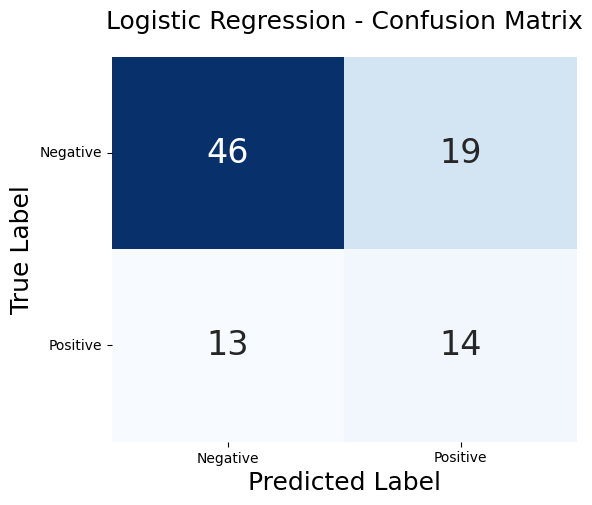


--- 9. Gerando Curva ROC (Inglês) ---
Curva ROC salva como: roc_curve_logistic_regression.png


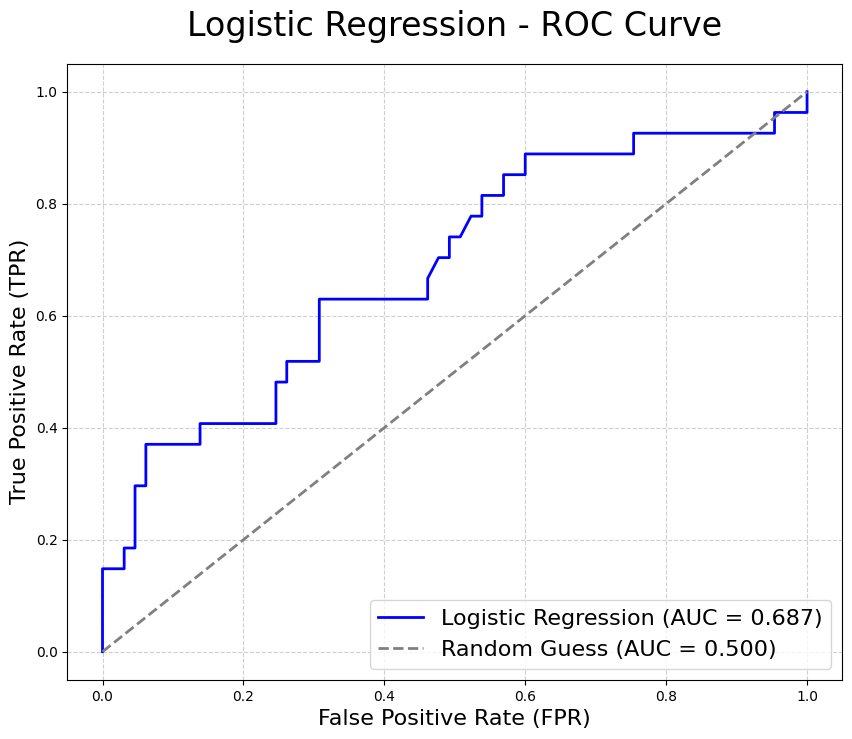


--- Processo Completo Concluído ---
AUC Score final: 0.6866


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Módulos do Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

# Ignorar avisos
warnings.filterwarnings('ignore')

# --- 1. Definir Caminho (DO SEU SCRIPT) ---
print("--- 1. Usando Caminhos do '007_final_model_training_lr' ---")
DATA_FILE_PATH = '../data/raw/leish_dataset.csv'

if not os.path.exists(DATA_FILE_PATH):
    print(f"ERRO: Arquivo não encontrado em '{os.path.abspath(DATA_FILE_PATH)}'")
    print("Por favor, verifique se o caminho do arquivo está correto.")
else:
    print(f"Arquivo '{DATA_FILE_PATH}' encontrado.")

    # --- 2. Carregar e Pré-processar (EXATAMENTE COMO NO SEU SCRIPT V2) ---
    print("\n--- 2. Carregando e Pré-processando (Estilo V2) ---")
    
    # Seu script usa pd.read_csv(DATA_FILE_PATH), que assume sep=','
    try:
        df = pd.read_csv(DATA_FILE_PATH)
        print("Arquivo lido com sucesso (default sep=',').")
    except Exception as e:
        print(f"ERRO FATAL ao ler {DATA_FILE_PATH}: {e}")
        df = None

    if df is not None:
        df_processed = df.copy()

        # Preencher NaNs em colunas de objeto (como no seu script)
        for col in df_processed.select_dtypes(include=['object']).columns:
            df_processed[col] = df_processed[col].fillna('Unknown')
        
        # Codificar a variável Alvo (como no seu script)
        target_column = 'diagnosis' # Confirmado pelo seu script
        target_map = {'positivo': 1, 'negativo': 0, 'Unknown': 0}
        df_processed[target_column] = df_processed[target_column].map(target_map)
        # Preencher qualquer NaN que possa ter sobrado (ex: valores não mapeados)
        df_processed[target_column] = df_processed[target_column].fillna(0).astype(int)

        # Separar features (X) e alvo (y)
        X_categorical = df_processed.drop(target_column, axis=1)
        y = df_processed[target_column]
        
        # Preencher NaNs numéricos (Passo de segurança que não está no seu script, 
        # mas previne erros se houver NaNs em colunas numéricas)
        for col in X_categorical.select_dtypes(include=['float64', 'int64']).columns:
            X_categorical[col] = X_categorical[col].fillna(0)

        # Aplicar One-Hot Encoding (como no seu script)
        X_numeric = pd.get_dummies(X_categorical, drop_first=False, dtype=int)
        
        print(f"Dados prontos. Shape das features: {X_numeric.shape}")
        print(f"Distribuição do alvo (y):\n{y.value_counts(normalize=True)}")

        # --- 3. Divisão Treino-Teste (NOVO PASSO PARA AVALIAÇÃO) ---
        print("\n--- 3. Dividindo em Treino e Teste (80/20) ---")
        X_train, X_test, y_train, y_test = train_test_split(
            X_numeric, y, 
            test_size=0.2, 
            random_state=42, 
            stratify=y
        )

        # Garantir que X_test tenha as mesmas colunas que X_train
        # (Simulando o 'training_columns.joblib')
        training_columns = X_train.columns.tolist()
        X_test = X_test.reindex(columns=training_columns, fill_value=0)
        X_train = X_train.reindex(columns=training_columns, fill_value=0)


        # --- 4. Scaling (StandardScaler) ---
        print("--- 4. Aplicando StandardScaler (Fit no Treino) ---")
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # --- 5. Treinamento do Modelo ---
        print("--- 5. Treinando Modelo (Regressão Logística) ---")
        lr_model = LogisticRegression(
            max_iter=1000,
            random_state=42,
            class_weight='balanced' # Estratégia do seu script V2
        )
        lr_model.fit(X_train_scaled, y_train)
        print("--- Modelo treinado com sucesso ---")

        # --- 6. Obter Previsões ---
        print("\n--- 6. Gerando Previsões (Classe e Probabilidade) ---")
        y_pred_lr = lr_model.predict(X_test_scaled)
        y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
        print("Previsões obtidas.")
        
        # --- 7. Relatório de Classificação (Bônus) ---
        print("\n--- Relatório de Classificação (Teste) ---")
        print(classification_report(y_test, y_pred_lr, target_names=['Negative (0)', 'Positive (1)']))

        # --- 8. Gerar Matriz de Confusão (em Inglês) ---
        print("\n--- 8. Gerando Matriz de Confusão (Inglês) ---")
        cm_lr = confusion_matrix(y_test, y_pred_lr)
        labels = ['Negative', 'Positive']
        plt.figure(figsize=(6, 5))
        ax = sns.heatmap(
            cm_lr, annot=True, fmt='d', cmap='Blues',
            cbar=False, annot_kws={"size": 24}
        )
        ax.set_title('Logistic Regression - Confusion Matrix', fontsize=18, pad=20)
        ax.set_xlabel('Predicted Label', fontsize=18)
        ax.set_ylabel('True Label', fontsize=18)
        ax.set_xticks(np.arange(len(labels)) + 0.5)
        ax.set_yticks(np.arange(len(labels)) + 0.5)
        ax.set_xticklabels(labels, ha='center')
        ax.set_yticklabels(labels, va='center', rotation=0)
        
        cm_filename = 'confusion_matrix_logistic_regression.png'
        plt.savefig(cm_filename, dpi=300, bbox_inches='tight')
        print(f"Matriz de Confusão salva como: {cm_filename}")
        plt.show()

        # --- 9. Gerar Curva ROC e AUC (em Inglês) ---
        print("\n--- 9. Gerando Curva ROC (Inglês) ---")
        fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
        auc_lr = roc_auc_score(y_test, y_proba_lr)
        
        plt.figure(figsize=(10, 8))
        plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, 
                 label=f'Logistic Regression (AUC = {auc_lr:.3f})')
        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', 
                 label='Random Guess (AUC = 0.500)')
        
        plt.xlabel('False Positive Rate (FPR)', fontsize=16)
        plt.ylabel('True Positive Rate (TPR)', fontsize=16)
        plt.title('Logistic Regression - ROC Curve', fontsize=24, pad=20)
        plt.legend(loc='lower right', fontsize=16)
        plt.grid(True, linestyle='--', alpha=0.6)
        
        roc_filename = 'roc_curve_logistic_regression.png'
        plt.savefig(roc_filename, dpi=300, bbox_inches='tight')
        print(f"Curva ROC salva como: {roc_filename}")
        plt.show()

        print(f"\n--- Processo Completo Concluído ---")
        print(f"AUC Score final: {auc_lr:.4f}")